In [42]:
import django
django.setup()
import os
from DatasetAnnotator.models import Posts
from django.conf import settings
from django.db.models import Q

In [2]:
# discussions length distribution

available_dbs = settings.DATABASES.keys()[1:]

counting = dict()

for db in available_dbs:
    os.write(1, db+"\n")
    counting[db] = []
    
    questions_id_list = Posts.objects\
        .using(db)\
        .filter(posttypeid=1)\
        .values_list('id', flat=True)
    
    for question_id in questions_id_list:
        answers_count = Posts.objects \
        .using(db)\
        .filter(parentid=question_id)\
        .count()
        
        counting[db].append(answers_count + 1)

In [62]:
# counting absolute items
print '\nTotal nr. of questions'
for db in available_dbs:
    print '{}:\t{}'.format(db, Posts.objects\
        .using(db)\
        .filter(posttypeid=1)\
        .count())
    
print '\nTotal nr. of answers'
for db in available_dbs:
    print '{}:\t{}'.format(db, Posts.objects\
        .using(db)\
        .filter(posttypeid=2)\
        .count())
    
print '\nTotal nr. of other posts'
for db in available_dbs:
    print '{}:\t{}'.format(db, Posts.objects\
        .using(db)\
        .exclude(posttypeid=1)\
        .exclude(posttypeid=2)\
        .count())
        
# counting annotated posts
print '\nAnnotated posts\n'
for db in available_dbs:
    print '{}:{:d}'.format(db, Posts.objects.using(db).filter(Q(annotatedqualityenrico__isnull=False) | \
                                    Q(annotatedqualitymarit__isnull=False) | \
                                    Q(annotatedqualitychristine__isnull=False) | \
                                    Q(annotatedqualityhenrik__isnull=False))\
                            .count())

# counting annotated questions
print '\nAnnotated questions\n'
for db in available_dbs:
    print('{}: {:d}').format(db, Posts.objects.using(db)\
                                    .filter(posttypeid=1)\
                                    .filter(Q(annotatedqualityenrico__isnull=False) | \
                                    Q(annotatedqualitymarit__isnull=False) | \
                                    Q(annotatedqualitychristine__isnull=False) | \
                                    Q(annotatedqualityhenrik__isnull=False))\
                            .count())


Total nr. of questions
webapps:	20573
travel:	19279
cooking:	15404

Total nr. of answers
webapps:	29881
travel:	32915
cooking:	38709

Total nr. of other posts
webapps:	1353


travel:	3386
cooking:	453

Annotated posts



webapps:0


travel:0
cooking:0

Annotated questions



webapps: 0


travel: 0
cooking: 0


In [13]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

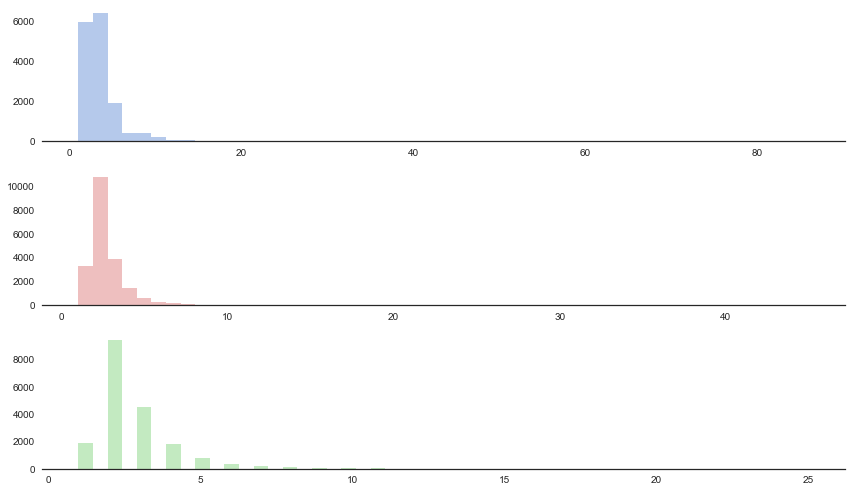

In [33]:
# Set up the matplotlib figure
f, axes = plt.subplots(3, 1, figsize=(12, 7))
sns.despine(left=True)


sns.distplot(a=counting['cooking'], kde=False, color="b", ax=axes[0])
sns.distplot(a=counting['webapps'], kde=False, color="r", ax=axes[1])
sns.distplot(a=counting['travel'], kde=False, color="g", ax=axes[2])
plt.tight_layout()

In [ ]:
#TODO get all the stats in the paper
# also compare annotated dataset with normal one